No Loc, no inflation, N=20

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import seaborn as sns
from cmcrameri import cm

mpl.rcParams['lines.markersize']=10
mpl.rcParams['axes.titlesize']=30
mpl.rcParams['legend.fontsize']=20
mpl.rcParams['xtick.labelsize']=15
mpl.rcParams['ytick.labelsize']=15
mpl.rcParams['axes.labelsize']=20

In [128]:
# Change here for different observation gap and observation covariance parameter
sigma=0.5
mu=np.round(sigma**2,2)
ob_gap=0.05
N=20 
loc_fun='none'
l_scale=0
alpha=1.0
ob_dim=40
ecov=2.0 

ebias=4.0     

exp_path='/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/seed_3_obs_full_state'
os.chdir(exp_path)

#load the state
state=np.load('sigma=0.0/state_noisy_g=0.05_sigma=0.0.npy')


# State and obs
obs=np.load('sigma={}/state_noisy_g=0.05_sigma={}.npy'.format(sigma,sigma))

#Go inside the data folder......................................
folder_label='ebias={}_ecov={}_obs={}_ens={}_mu={}_gap={}_alpha={}_loc=none_r={}'.format(ebias, ecov,ob_dim,N,mu,ob_gap,alpha,l_scale)
print(os.getcwd())
os.chdir(folder_label)

#Load data....
a_ens=np.load('filtered_ens.npy') #ens has shape:=[time steps,system dimension,ensemble number]
a_mean=np.mean(a_ens,axis=2)
np.save('filter_mean.npy',a_mean)

/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/seed_3_obs_full_state


In [108]:
# Change here for different observation gap and observation covariance parameter
sigma=0.5
mu=np.round(sigma**2,2)
ob_gap=0.05
N=20 
loc_fun='none'
l_scale=0
alpha=1.0
ob_dim=40
ecov=2.0 
ebias=4.0     


os.chdir(exp_path)

# State and obs
obs1=np.load('sigma={}/state_noisy_g=0.05_sigma={}.npy'.format(sigma,sigma))
#Go inside the data folder......................................
folder_label='ebias={}_ecov={}_obs={}_ens={}_mu={}_gap={}_alpha={}_loc=none_r={}'.format(ebias, ecov,ob_dim,N,mu,ob_gap,alpha,l_scale)
print(os.getcwd())
os.chdir(folder_label)

#Load data....
a1_ens=np.load('filtered_ens.npy') #ens has shape:=[time steps,system dimension,ensemble number]
a1_mean=np.mean(a1_ens,axis=2)

/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/seed_3_obs_full_state


In [109]:
# os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/assimilated_trajs/')
# os.mkdir('mu={}_times_I20'.format(mu))
# os.chdir('mu={}_times_I20'.format(mu))
# np.save('filter_mean.npy',a1_mean)         

In [110]:
time=ob_gap*np.arange(a_mean.shape[0])

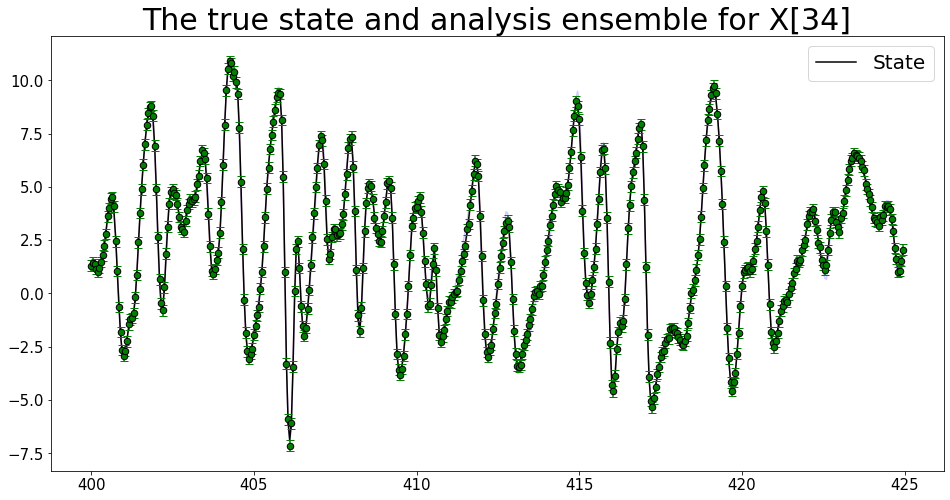

In [111]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=8000
t_stop=8500
# component to view
comp_=34
#plt.plot(time[t_start:t_stop],a1_mean[t_start:t_stop,comp_],c='r',alpha=1)

plt.plot(time[t_start:t_stop],a_mean[t_start:t_stop,comp_],c='r',alpha=0.2)
plt.plot(time[t_start:t_stop],a1_mean[t_start:t_stop,comp_],c='blue',alpha=0.2)
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='black',label='State')
plt.errorbar(x=time[t_start:t_stop],y=obs[t_start:t_stop,comp_],yerr=mu,c='g',mec='black',mfc='g',capsize=4,fmt='.',ms=13)
plt.legend()

plt.title(r'The true state and analysis ensemble for X[{}]'.format(comp_))
#plt.xticks(time[t_start:t_stop],fontsize=12)
plt.legend(frameon='True')
#plt.savefig('overfit_2.png')

In [129]:
err_a=state-a_mean
err_o=state-obs
#err_a1=state-a1_mean
#err_o1=state-obs1

In [130]:
cov_a=np.cov(err_a[1000:].T,rowvar='False')
print(cov_a.shape)
os.chdir(exp_path)
np.save('analysis_cov_ob_sigma={}.npy'.format(sigma),cov_a)

(40, 40)


In [113]:
# scaled-RMSE 
t_start=1000
model_dim=40
print(np.sqrt(np.mean(np.sum((err_a[t_start:t_stop])**2,axis=1),axis=0)/model_dim))
print(np.sqrt(np.mean(np.sum((err_o[t_start:t_stop])**2,axis=1),axis=0)/model_dim))
#print(mu)

0.10020570463322687
0.09981411989770202


In [115]:
print(np.sqrt(np.mean(np.sum((err_a1[t_start:t_stop])**2,axis=1),axis=0)/model_dim))
print(np.sqrt(np.mean(np.sum((err_o1[t_start:t_stop])**2,axis=1),axis=0)/model_dim))
#print(mu)

0.20445962973476373
0.4999969508786844


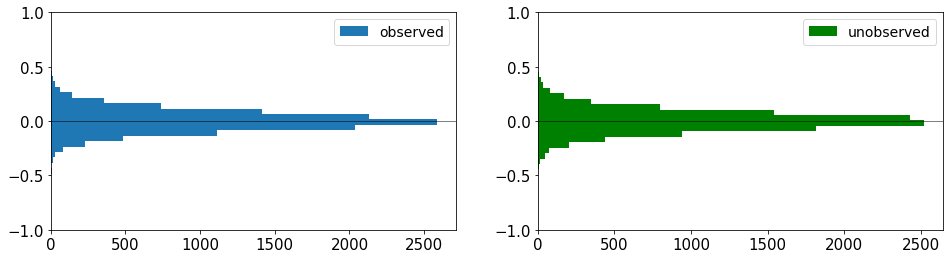

In [52]:
w=0.05
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
data=err_a[500:,11]
plt.hist(data,bins=np.arange(min(data), max(data) + w, w),fill=True,label='{}'.format('observed'),orientation='horizontal')
plt.axhline(0,c='black',lw=0.5)
plt.ylim(-1,1)
plt.legend(fontsize=14)


plt.subplot(1,2,2)
data=err_a[500:,14]
plt.hist(data,bins=np.arange(min(data), max(data) + w, w),label='{}'.format('unobserved'),lw=0.8,color='g',orientation='horizontal')
plt.ylim(-1,1)
plt.axhline(0,c='black',lw=0.5)
plt.legend(fontsize=14)

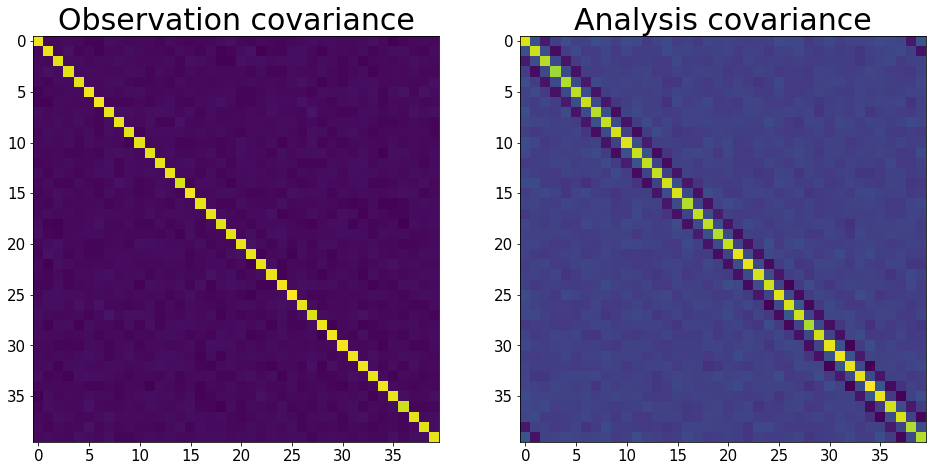

In [136]:
cov_o=np.cov(err_o.T,rowvar='False')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(cov_o)
plt.title('Observation covariance')
plt.subplot(1,2,2)
plt.imshow(cov_a)
plt.title('Analysis covariance')
os.chdir(exp_path)

plt.savefig('cov_diff.png')

In [79]:
d1=np.sqrt(np.diag(cov_o))
print(min(d1))
max(d1)

0.09826058041560008


0.1016159562436235

In [78]:
us=np.sqrt(np.linalg.eigvals(cov_o))
print(max(us))
min(us)

0.10528971040878303


0.09439405978456698

In [132]:
cov_a=np.cov(err_a.T,rowvar='False')

In [72]:
d=np.sqrt(np.diag(cov_a))
min(d)

0.10280044096943133

In [67]:
np.sqrt(np.linalg.eigvals(cov_a))

array([0.26480659, 0.12790442, 0.12557529, 0.12366831, 0.12259599,
       0.11984145, 0.11884082, 0.11787571, 0.1164724 , 0.11520942,
       0.11454511, 0.11255481, 0.07320678, 0.07469173, 0.07528958,
       0.07695385, 0.11058715, 0.10960012, 0.10865192, 0.10788295,
       0.10580421, 0.0790705 , 0.1039971 , 0.1031363 , 0.08141131,
       0.08172313, 0.10128269, 0.08406752, 0.09898965, 0.09774393,
       0.08573923, 0.08658694, 0.0881181 , 0.08851542, 0.09058565,
       0.0904354 , 0.09628379, 0.09520192, 0.09353039, 0.09217837])

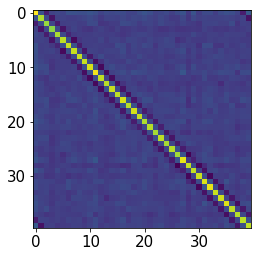

In [62]:
plt.imshow(cov_a)

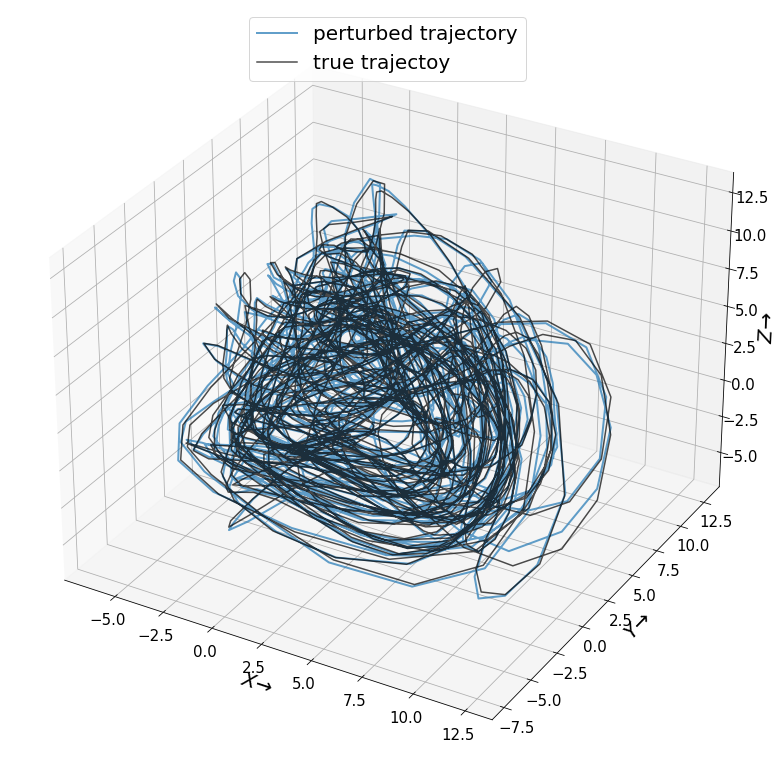

In [26]:
#plot the state and the trajectory
fig = plt.figure(figsize=(14,14))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.plot3D(a_mean[1000:3000,0],a_mean[1000:3000,1],a1_mean[1000:3000,2],label='perturbed trajectory',alpha=0.7,linestyle='-',lw=2)
ax.plot3D(state[1000:3000,0],state[1000:3000,1],state[1000:3000,2],label='{}'.format('true trajectoy'),c='black',alpha=0.7)

ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
plt.legend(loc='upper center')
#os.chdir('/home/shashank/Dropbox/Data_Assimilation/Thesis_writing/figures')
#plt.savefig('/home/shashank/Dropbox/Data_Assimilation/Thesis_writing/figures/perturbed_true.png')

min_rmse 1.1000248576728595
max_rmse 1.302835769631663


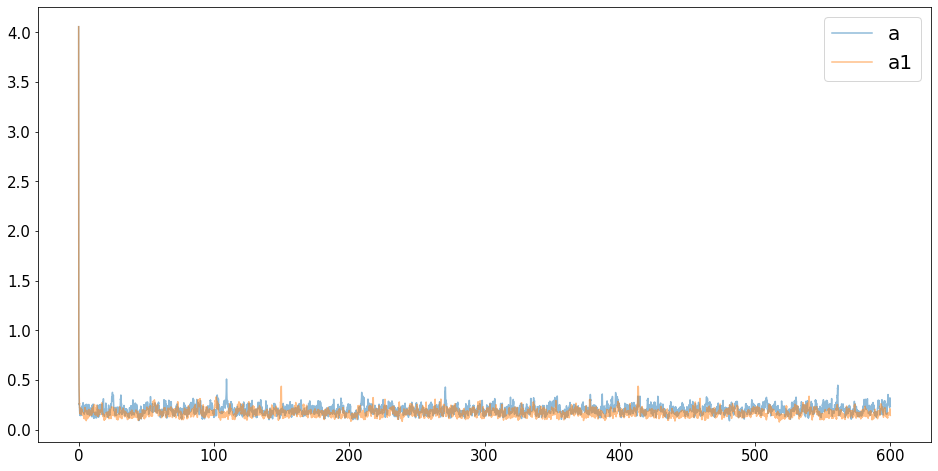

In [28]:
plt.figure(figsize=(16,8))
t_start=0
t_stop=12000
plt.plot(time[t_start:t_stop],np.sqrt(np.sum((state[t_start:t_stop]-a_mean[t_start:t_stop])**2,axis=1))/np.sqrt(40),linestyle='solid',alpha=0.5,label='a')
plt.plot(time[t_start:t_stop],np.sqrt(np.sum((state[t_start:t_stop]-a1_mean[t_start:t_stop])**2,axis=1))/np.sqrt(40),linestyle='solid',alpha=0.5,label='a1')
print('min_rmse',np.sqrt(np.mean(np.sum((state[t_start+1000:t_stop]-a1_mean[t_start+1000:t_stop])**2,axis=1))))
print('max_rmse',np.sqrt(np.mean(np.sum((state[t_start+1000:t_stop]-a_mean[t_start+1000:t_stop])**2,axis=1))))
plt.legend()

In [29]:
sn=np.zeros((a_ens.shape[0],2))
for i in range(a_ens.shape[0]):
    sn[i,0]=np.sqrt(np.trace(np.cov(a_ens[i],rowvar=True))/40)
    sn[i,1]=np.sqrt(np.trace(np.cov(a1_ens[i],rowvar=True))/40)

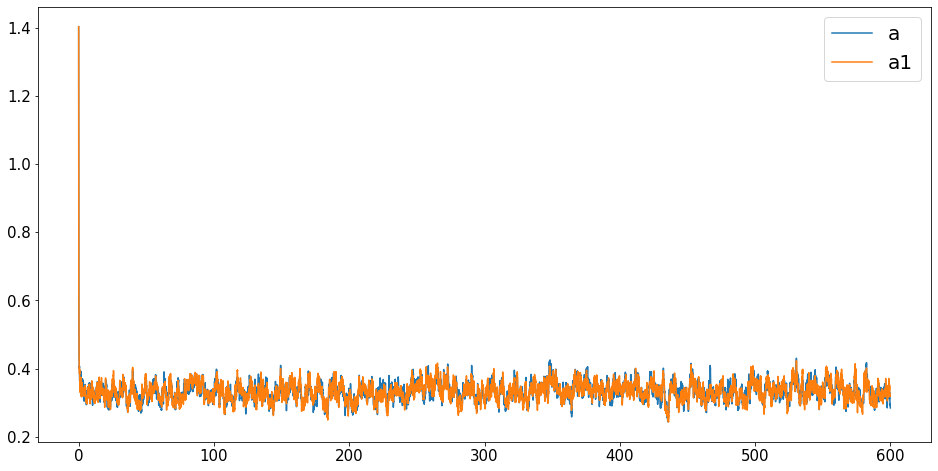

In [30]:
plt.figure(figsize=(16,8))

plt.plot(time[t_start:t_stop],sn[t_start:t_stop,0],label='a')
plt.plot(time[t_start:t_stop],sn[t_start:t_stop,1],label='a1')
plt.legend()

In [83]:
# Difference between an assimilated trajectory and a noisy trajectory
from scipy.linalg import svdvals

In [102]:
A=np.eye(8)
A[0,1]=A[0,1]+0.001
A

array([[1.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ]])

In [103]:
a=A[:,:1]
b=A[:,1:3]

In [104]:
svdvals(a.T@b)

array([0.001])

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])